# **KNN - Predict whether a person will have diabetes or not**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from scipy.stats import skew

In [ ]:
dataset = pd.read_csv('diabetes.csv')
print(len(dataset))
print(dataset)
dataset.head()

768
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1              

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()
dataset['Glucose']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

# **Characteristics_Plot**

0.8999119408414357
0.17341395519987735
-1.8400052311728738
0.109158762323673
2.2678104585131753
-0.42814327880861786
1.9161592037386292
1.127389259531697


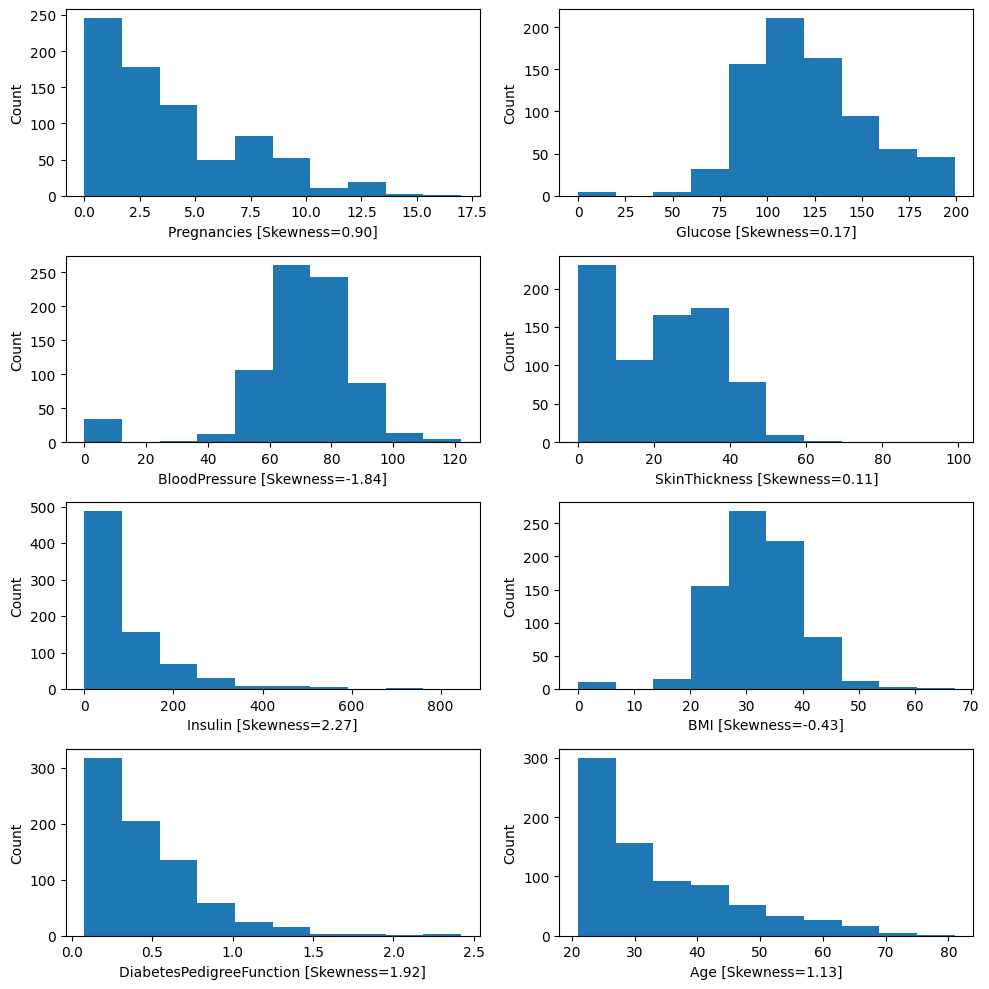

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
for i in range(4):
  for j in range(2):
    feature = dataset.columns[i*2+j]
    ax[i, j].hist(dataset[feature])
    # ax[i, j].set_title(feature)
    sk = skew(dataset[feature], bias=True)
    print(sk)
    ax[i, j].set_xlabel(f'{feature} [Skewness={sk:.2f}]')
    ax[i, j].set_ylabel('Count')
fig.tight_layout()

In [ ]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

In [ ]:
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

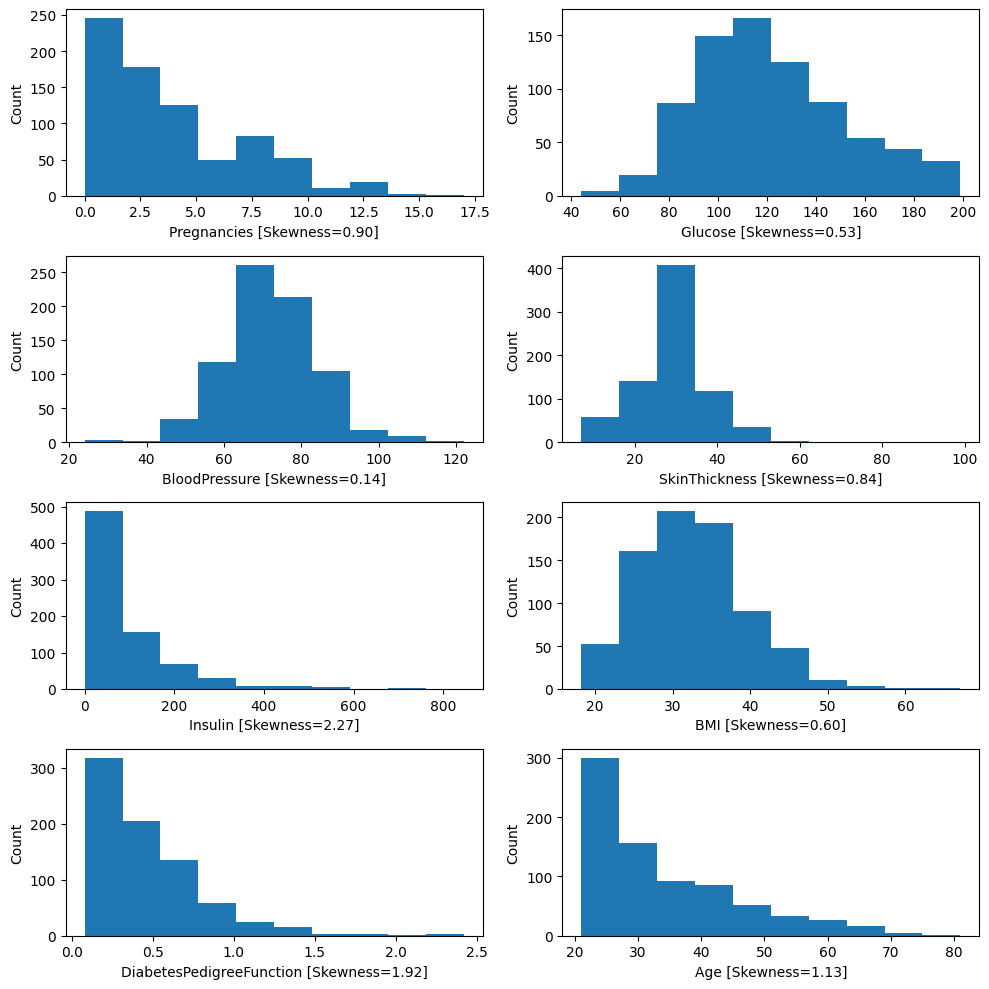

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
for i in range(4):
  for j in range(2):
    feature = dataset.columns[i*2+j]
    ax[i, j].hist(dataset[feature])
    # ax[i, j].set_title(feature)
    sk = skew(dataset[feature], bias=True)
    # print(sk)
    ax[i, j].set_xlabel(f'{feature} [Skewness={sk:.2f}]')
    ax[i, j].set_ylabel('Count')
fig.tight_layout()

In [ ]:
# split dataset
X = dataset.iloc[:, 1:8]
y = dataset.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


614
614
154
154


In [ ]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
import math
print(len(y_test))
print(len(X_test))
math.sqrt(len(X_train))

154
154


24.779023386727733

In [ ]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=23, p=2,metric='euclidean')

In [ ]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [ ]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

[[96 11]
 [15 32]]


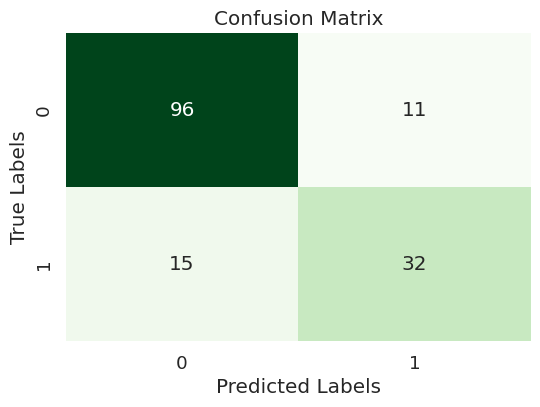

In [ ]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
#print(f1_score(y_test, y_pred))
# Set up the figure
plt.figure(figsize=(6, 4))
# Adjust the font size for readability
sns.set(font_scale=1.2)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

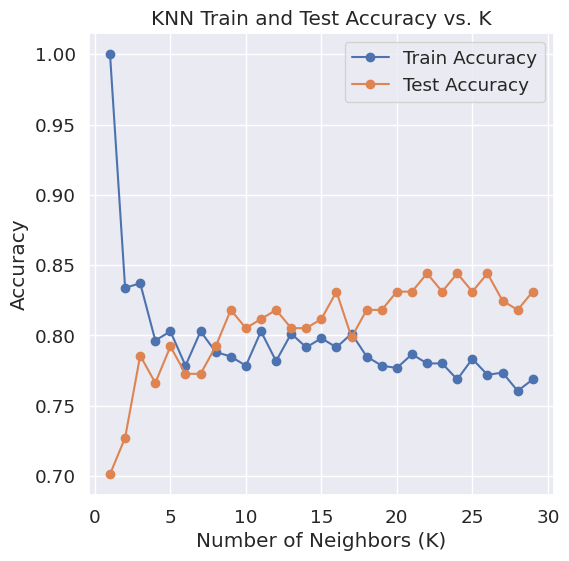

In [ ]:
# Initialize variables to store accuracy values
k_values = list(range(1, 30))
train_accuracy = []
test_accuracy = []

# Train KNN models with different values of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculate training accuracy
    train_accuracy.append(knn.score(X_train, y_train))

    # Calculate testing accuracy

    test_accuracy.append(knn.score(X_test, y_test))
    #print(k, acc)

# Plot the accuracy results
plt.figure(figsize=(6, 6))
plt.plot(k_values, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracy, marker='o', label='Test Accuracy')

plt.title('KNN Train and Test Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8311688311688312


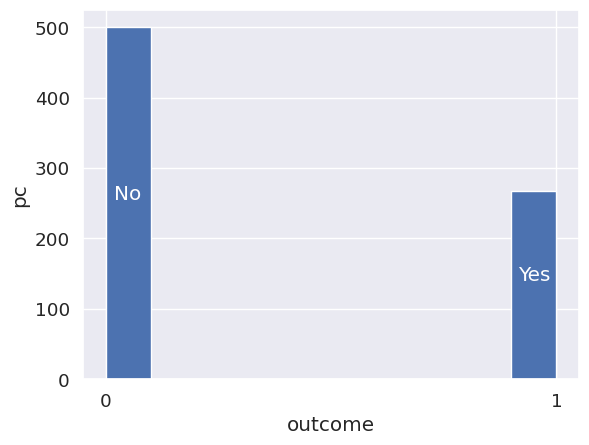

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_xticks([0, 1])
ax.hist(y, label=['Outcome'])
ax.set_xlabel('outcome')
ax.set_ylabel('pc')

# Make some labels.
rects = ax.patches
labels = list(range(len(rects)))
labels[0] = 'No'
labels[-1] = 'Yes'

k = list(zip(rects, labels))
for rect, label in [k[0], k[-1]]:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height/2, label,
            ha='center', va='bottom', color='white')

plt.show()

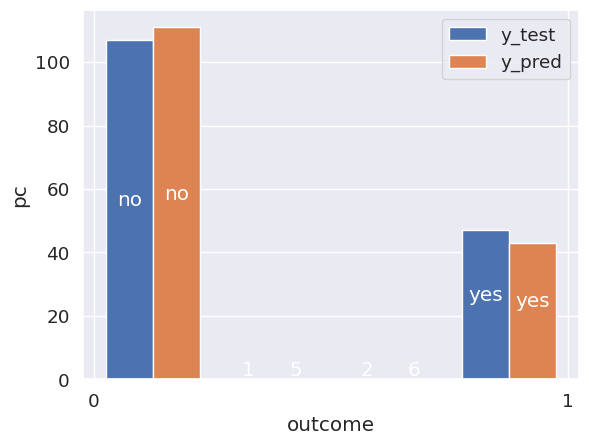

In [ ]:
fig, ax = plt.subplots(1, 1)


ax.set_xticks([0, 1])

ax.hist([y_test, y_pred], label=['y_test', 'y_pred'], bins=4)
ax.set_xlabel('outcome')
ax.set_ylabel('pc')
plt.legend()

# Make some labels.
rects = ax.patches
labels = list(range(len(rects)))
labels[0] = labels[4] = 'no'
labels[3] = labels[7] = 'yes'

k = list(zip(rects, labels))
for rect, label in k:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height/2, label,
            ha='center', va='bottom', color='white')

plt.show()